# 实验四：朴素贝叶斯分类器
* 姓名：彭钰婷
* 学号：2013631
* 专业：计算机科学与技术

## 实验要求
### 基本要求
a) 采用分层采样的方式将数据集划分为训练集和测试集。 b) 给定编写一个朴素贝叶斯分类器，对测试集进行预测，计算分类准确率。
### 中级要求
使用测试集评估模型，得到混淆矩阵，精度，召回率，F值。
### 高级要求
在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值。

## 1 基本要求
### 1-1 划分数据集
采用分层采样的方式将数据集划分为训练集和测试集：

In [1]:
# -*- coding: UTF-8 -*-
import math
import numpy as np  
import pandas as pd

f = open('wine.data','r')
types = [[],[],[]]                      #按类分的所有数据
test_data = [[],[],[]]
train_data = [[],[],[]]
data_num = 0                            #数据总数
test_len = []                           #测试集里每一类的个数
means = [[],[],[]]                      #每一类的均值
std = [[],[],[]]                        #每一类的标准差
myline = '1'
while myline:
    myline = f.readline().split(',')
    if len(myline) != 14:
        break
    for t in range(len(myline)):
        if t == 0:
            myline[t] = int(myline[t])
        else:
            myline[t] = float(myline[t])
    temp = myline.pop(0)
    types[temp - 1].append(myline)
test_len = [round(len(types[i]) / 10) for i in range(3)]
data_num = sum([len(types[i]) for i in range(3)])

In [2]:
# 求test_data和train_data
test_data = [[],[],[]]
train_data = [[],[],[]]
for typei in range(3):
    testcnt = 0
    for i in range(len(types[typei])):       
        if testcnt >= test_len[typei]:
            train_data[typei].append(types[typei][i])
        else:
            test_data[typei].append(types[typei][i])
            testcnt += 1
print("train_data size is {0}+{1}+{2}, test_data size is {3}+{4}+{5}".format(len(train_data[0]),len(train_data[1]),len(train_data[2]),len(test_data[0]),len(test_data[1]),len(test_data[2])))

train_data size is 53+64+43, test_data size is 6+7+5


### 1-2 给定编写一个朴素贝叶斯分类器，对测试集进行预测，计算分类准确率。

In [3]:
def bayes_classificate(train_data, test_data,types, data_num):
    # 首先，分别计算训练集上三个类的均值和标准差
    # mean = ...
    # std = ...
    real_y = []
    pre_y = []
    means=[np.mean(train_data[i],axis=0) for i in range(3)]#均值
    stds=[np.std(train_data[i],axis=0) for i in range(3)]#标准差
    scores = [[],[],[]]
    wrong_num = 0
    for i in range(3):
        for t in test_data[i]:                  #两层循环：从每一类取每一个测试样本
            my_type = []
            for j in range(3):
                #由于数据集中所有的属性都是连续值，连续值的似然估计可以按照高斯分布来计算：
                # temp = ...
                temp = np.exp(-np.power(t-means[j],2)/(2*np.power(stds[j],2)))/((2*math.pi)**0.5*stds[j])
                temp = np.prod(temp)# 相乘每一项高斯分布值
                temp *= len(types[j])/data_num
                my_type.append(temp)                        #这里将所有score保存
                scores[j].append(temp)
            pre_type = my_type.index(max(my_type))          #取分值最大的为预测类别
            pre_y.append(pre_type)#记录预测值
            real_y.append(i)
            if pre_type != i:                               #统计错误数
                wrong_num+=1
    return wrong_num,real_y,pre_y,scores

In [4]:
wrong_num,real_y,pre_y,scores = bayes_classificate(train_data,test_data,types, data_num)
print("对测试集进行预测，分类准确率为:"+str(1-wrong_num/data_num))#正确率

对测试集进行预测，分类准确率为:0.9943820224719101


## 2 中级要求
使用测试集评估模型，得到混淆矩阵，精度，召回率，F值。

In [5]:
def confusion(real_y,pre_y):
    label=['1','2','3']
    conf = []
    for i in range(3):
        conf.append([0] * 3)
    for i in range(len(real_y)):
        conf[real_y[i]][pre_y[i]] += 1
    conf=np.array(conf)
    print("混淆矩阵:\n",conf)
    precision=[]
    recall=[]
    F1_score=[]
    for i in range(3):
       precision.append(round(conf[i][i]/np.sum(conf,axis=0)[i],2))
       recall.append(round(conf[i][i]/np.sum(conf,axis=1)[i],2))
       F1_score.append(round(2*precision[i]*recall[i]/(precision[i]+recall[i]),2))
    print("    precision ")
    for i in range(3):
        print("{}    {}    ".format(i+1,precision[i]))
    print("    recall")
    for i in range(3):
        print("{}    {}    ".format(i+1,recall[i]))
    print("    F1_score ")
    for i in range(3):
        print("{}    {}    ".format(i+1,F1_score[i]))
    sns.heatmap(conf,annot=True,fmt='d',xticklabels=label,yticklabels=label)#混淆矩阵
    plt.ylabel('real result', fontsize=18)
    plt.xlabel('predict result', fontsize=18)
    plt.show()

混淆矩阵:
 [[6 0 0]
 [0 6 1]
 [0 0 5]]
    precision 
1    1.0    
2    1.0    
3    0.83    
    recall
1    1.0    
2    0.86    
3    1.0    
    F1_score 
1    1.0    
2    0.92    
3    0.91    


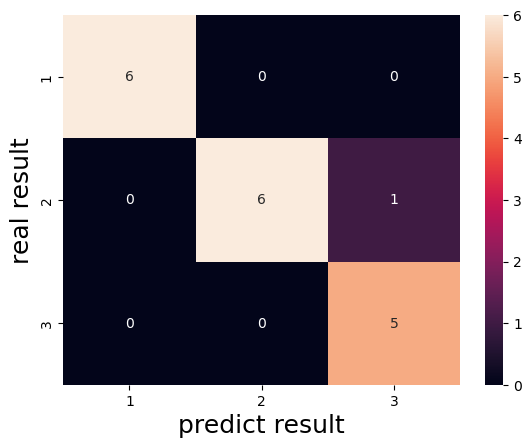

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
confusion(real_y,pre_y)

## 3 高级要求
在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值。
ROC作图步骤参考资料https://blog.csdn.net/yinyu19950811/article/details/81288287

In [8]:
def ROC(pre_y,real_y,scores):
    fpr = [[],[],[]]
    tpr = [[],[],[]]
    auclist = []
    # 计算fpr和tpr，阈值从大到小
    for typei in range(3):
        for i in np.argsort(scores[typei])[::-1]:
            threshold = scores[typei][i]
            if threshold == np.max(scores[typei]):
                fpr[typei].append(0)
                tpr[typei].append(0)
                continue
            elif threshold == np.min(scores[typei]):
                fpr[typei].append(1)
                tpr[typei].append(1)
                continue
            tp = 0
            fp = 0
            fn = 0
            tn = 0
            for j in range(len(scores[typei])):
                if scores[typei][j] >= threshold:# 预测为positive
                    if real_y[j] == typei:# 实际为positive
                        tp += 1
                    else:
                        fp += 1
                else:# 预测为negative
                    if real_y[j] == typei:# 实际为positive
                        fn += 1
                    else:
                        tn += 1
            fpr[typei].append(fp / (fp + tn))
            tpr[typei].append(tp / (tp + fn))
        auc = 0
        for i in range(1, len(fpr[typei])):
            auc += 0.5 * (fpr[typei][i] - fpr[typei][i - 1]) * (tpr[typei][i] + tpr[typei][i - 1])
        plt.title('ROC')
        plt.plot(fpr[typei], tpr[typei], color='green', label='ROC')
        plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
        plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
        plt.legend()
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.show()
        auclist.append(auc)
    return auclist

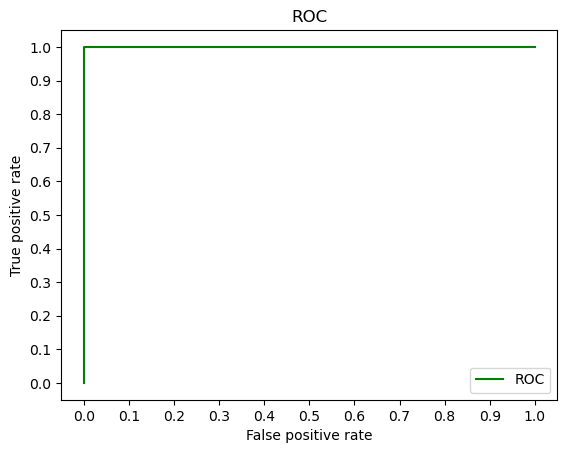

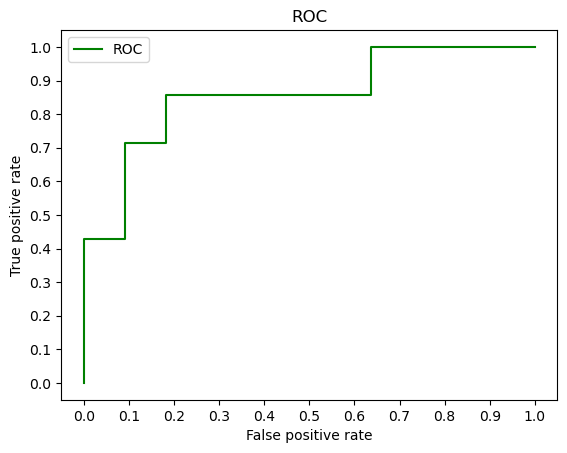

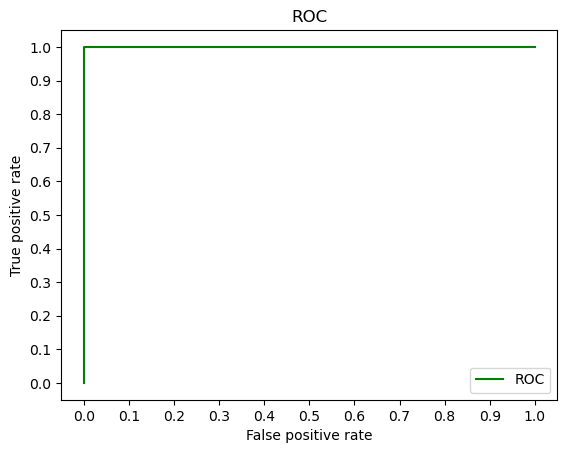

AUC result :  [1.0, 0.8571428571428571, 1.0]


In [9]:
auclist = ROC(pre_y,real_y,scores)
print("AUC result : ",auclist)